In [5]:
%matplotlib inline
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.figsize'] = (7, 3.5)

In [14]:
fs = 30720000

# Read only the PUSCH slots of interest
t0 = 0.0757
T = 10e-3
x = np.fromfile('LTE_uplink_847MHz_2022-01-30_30720ksps.sigmf-data', 'int16',
                offset=int(t0*fs*4), count=int(T*fs*2))

# Scale amplitude so that the PUSCH QPSK symbols are +/-1 +/-1j
x = (x[::2] + 1j*x[1::2])/2e4
# Correct for CFO. The CFO is measured with the PUSCH and DMRS.
delta_f = -1060
# Adjust phase offset (done with DMRS signal)
delta_phi = -1.9

x *= np.exp(1j*(2*np.pi*delta_f/fs*np.arange(x.size) + delta_phi))

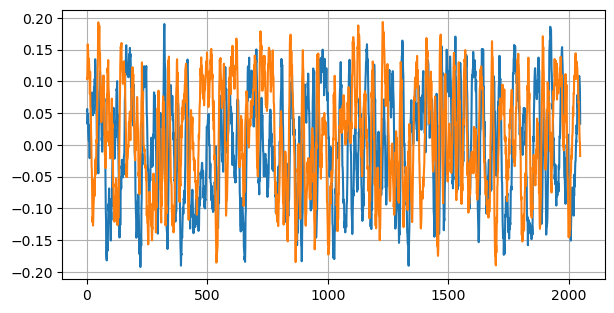

In [61]:
x_roi = x[100*2048:101*2048]
plt.plot(np.real(x_roi))
plt.plot(np.imag(x_roi))
plt.grid()

In [62]:
fft_roi = fft.fft(np.real(x_roi))

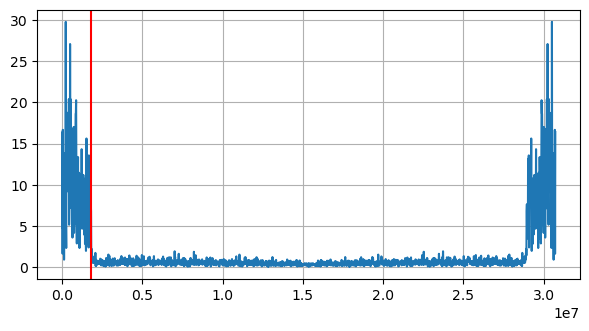

In [63]:
f = np.linspace(0,fs,len(fft_roi))
amp = np.abs(fft_roi)

plt.plot(f,amp)
plt.axvline(x = 1_800_000, color = 'r') 
plt.grid()

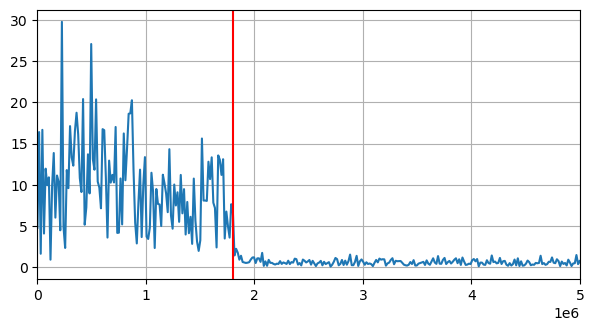

In [67]:
plt.plot(f,amp)
plt.xlim(0,5000_000)
plt.axvline(x = 1_800_000, color = 'r' )
plt.grid()

<img src="Waterfall.png" alt="Alternative text" />